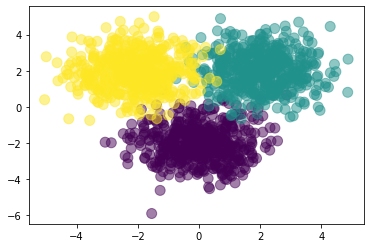

Classification rate for randomly chosen weights: 0.07733333333333334


In [2]:
# forward propagation example for deep learning in python class.
#
# the notes for this class can be found at: 
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future



import numpy as np
import matplotlib.pyplot as plt

Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# randomly initialize weights
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1) # sigmoid
    # Z = np.tanh(X.dot(W1) + b1) # tanh
    # Z = np.maximum(X.dot(W1) + b1, 0) # relu
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y

# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1)

# verify we chose the correct axis
assert(len(P) == len(Y))

print("Classification rate for randomly chosen weights:", classification_rate(Y, P))